## 1. Import Dependencies
- **Essential Libraries for Machine Learning: Data Preprocessing, Sampling, Classification, Resampling, Model Training, Parameter tuning and Evaluation**

In [91]:
from collections import Counter
from pprint import pprint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, f1_score, 
                             confusion_matrix, classification_report)

In [2]:
pd.set_option('display.max_columns', None)

## 2. Data Ingestion
- **Loading and Exploring the Telco Churn Dataset**

In [3]:
data = pd.read_csv("telcoChurn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- This line reads the dataset from the CSV file `"telcoChurn.csv"` into a 
pandas DataFrame named data. The `pd.read_csv()` function is commonly used to 
load structured data into a DataFrame for further analysis or manipulation in Python.

## 3. Descriptive Statistics Analysis
- **Summarize and describe the main features of the dataset.**

In [4]:
data.shape

(7043, 21)

- Returns the shape (dimensions) of the dataset. The output is a tuple where the first value represents the number of rows (samples), and the second value represents the number of columns (features).

In [5]:
def value_counts(data: pd.DataFrame = None,column: str = None):
    """
    This function takes in a pandas DataFrame and a column name and returns a Series with value_counts normalized and sorted in ascending order
    
    Parameters
    ----------
    data : pd.DataFrame, optional
        The pandas DataFrame containing the column to be counted, by default None
    column : str, optional
        The column name to be counted, by default None

    Returns
    -------
    A Series with value_counts normalized and sorted in ascending order
    """
    value_counts = data[column].value_counts(normalize=True).sort_values(ascending=True)
    return print(value_counts)

In [6]:
value_counts(data=data, column='Churn')

Churn
Yes    0.26537
No     0.73463
Name: proportion, dtype: float64


- This provides the proportion (relative frequency) of each class `(Yes or No)` in the 'Churn' column. Using `normalize=True` converts the counts into percentages, which is useful for understanding the class distribution in an imbalanced dataset.
- This output indicates that around `73.5%` of the customers did not churn, while `26.5%` churned.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- This provides a concise summary of the dataset. It includes the number of non-null values in each column, the data types of each feature (e.g., `int64`, `float64`, `object`), and the memory usage. It's helpful to quickly check for missing data and data types.

In [8]:
data.drop(data[data['TotalCharges'] == " "].index, axis=0, inplace=True)
data['TotalCharges'] = data['TotalCharges'].astype('float')
data.describe() 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- Generates descriptive statistics for numerical columns, including `count, mean, standard deviation, minimum, maximum, and quartile values`. It's useful for getting a basic understanding of the distribution of numerical features.

In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- Shows the total number of `missing (null) values` in each column of the dataset. If the result is zero for all columns, it means there are no missing values.

In [10]:
data.duplicated().sum()

0

- This line checks for any duplicate rows in the dataset. The `data.duplicated()` function returns a Boolean Series where True indicates a duplicate row. The `sum()` function then counts the total number of True values, effectively giving the number of duplicated rows. This is useful for detecting and possibly removing redundant data in your dataset to ensure data quality.

In [11]:
def unique_values(data: pd.DataFrame = None, column: str = None):
    """
    Prints the unique values present in the given column of the given DataFrame.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the column.
    column (str): The column whose unique values are to be printed.

    Returns:
    None
    """
    unique_values = data[column].unique()
    return print(unique_values)

In [12]:
unique_values(data=data, column='gender')

['Female' 'Male']


In [13]:
def unique_values_df(data: pd.DataFrame, columns_to_drop=None):
    """
    Create a DataFrame showing the unique values for each column in a given DataFrame.
    
    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame.
    columns_to_drop : list or None, default=None
        The columns to remove from the DataFrame before computing the unique values.
    
    Returns
    -------
    unique_df : pd.DataFrame
        A DataFrame where each column is a Series containing the unique values from the
        corresponding column in the input DataFrame.
    """
    if columns_to_drop:
        data = data.drop(columns=columns_to_drop)

    unique_values_dict = {}

    for column in data.columns:
        unique_values = data[column].unique()
        unique_values_dict[column] = unique_values

    unique_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_values_dict.items()]))

    return unique_df

columns_to_drop = ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']  # Specify the columns to drop
unique_values_df = unique_values_df(data, columns_to_drop=columns_to_drop)
unique_values_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0.0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,1.0,No,Yes,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,No,Mailed check,Yes
2,NaN,NaN,NaN,NaN,NaN,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,NaN,Bank transfer (automatic),NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Credit card (automatic),NaN


## 4. Data Preprocessing
- **It helps prepare and clean the data to make it suitable for modeling.**

### 4.1 Data Cleaning

In [14]:
# data.drop(data[data['TotalCharges'] == " "].index, axis=0, inplace=True)
# data['TotalCharges'] = data['TotalCharges'].astype('float') 
# / The above two process has been done in the previous cell(16)

- First line removes rows from the DataFrame where the `TotalCharges` column contains an empty string `" "`
- Second line Converts the TotalCharges column to the `float` data type.

In [15]:
data.drop(columns=['customerID'], axis=1, inplace=True)

- This line of code removes the `customerID` column from the DataFrame.

### 4.1.a Handling Outliers

- **Detect and handle outliers using statistical methods or visualizations.**

In [16]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
def outliers_plot(data: pd.DataFrame = None, column: str = None):
    """
    Function to plot outliers of a given column in a DataFrame.
    
    Parameters
    ----------
    data : pd.DataFrame
        DataFrame containing the data to be plotted.
    column : str
        Name of the column in the DataFrame to plot outliers for.
    """
    sns.boxplot(data=data, x=column)
    plt.title(f'Distribution of {column}')

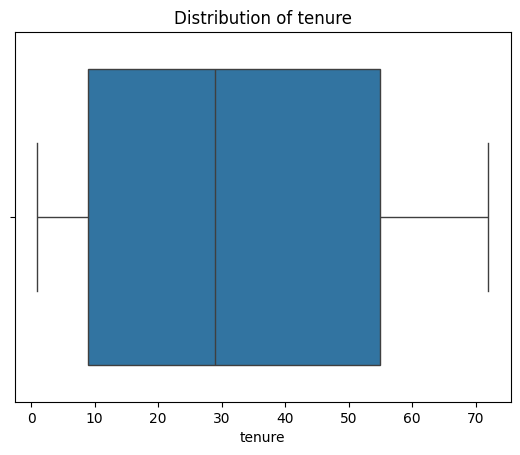

In [18]:
outliers_plot(data=data, column='tenure')

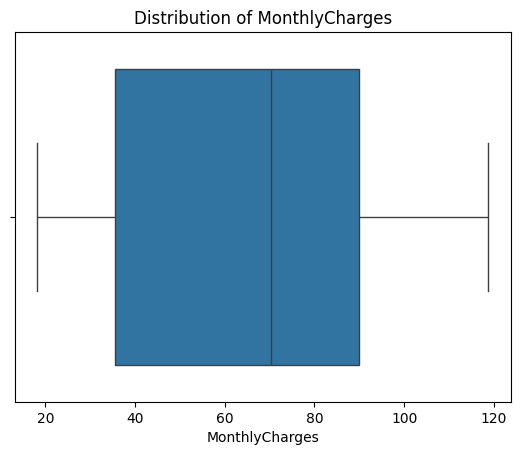

In [19]:
outliers_plot(data=data, column='MonthlyCharges')

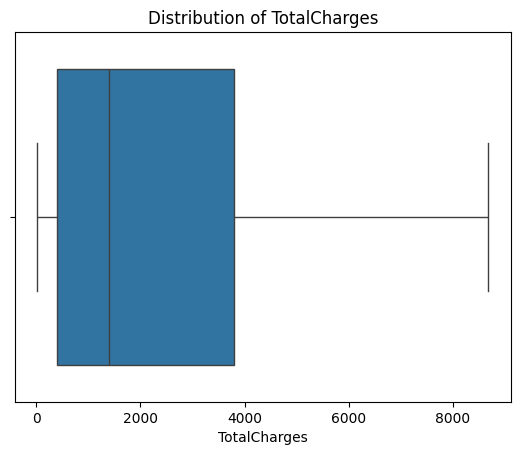

In [20]:
outliers_plot(data=data, column='TotalCharges')

- Boxplots were used to visually inspect the numerical columns, `'tenure', 'MonthlyCharges', and
'TotalCharges'` for outliers.
- The analysis confirmed that there are no outliers present in these columns.


## 5. Data Transformation
- **The primary goal is to improve the quality of the data.**
- **For data transformation, you might want to include operations such as scaling, normalization, encoding, and feature engineering.**

### 5.1 Encoding Categorical Variables
- **Many machine learning algorithms require numerical input and cannot work directly with categorical data (e.g., strings or labels)**

### 5.1.a Label Encoding
- **Assign integer values to categorical labels**

In [21]:
def genderLabelEncoding(data: pd.DataFrame, column: str = 'gender'):
    """
    Encodes 'Female' as 1 and 'Male' as 0 in the specified column.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.
    column (str): The column name to encode. Default is 'gender'.
    
    Returns:
    pd.DataFrame: The DataFrame with the gender column encoded.
    """
    data[column] = data[column].map({'Female': 1, 'Male': 0})
    
    return data


In [22]:
gender_encoded = genderLabelEncoding(data=data)

In [23]:
def multipleLinesLabelEncoding(data: pd.DataFrame, column: str = 'MultipleLines'):
    """
    Encodes 'No phone service' as 0, 'No' as 0, and 'Yes' as 1 in the specified column.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.
    column (str): The column name to encode. Default is 'MultipleLines'.
    
    Returns:
    pd.DataFrame: The DataFrame with the MultipleLines column encoded.
    """
    data[column] = data[column].map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    return data

In [24]:
multiLines_encoded = multipleLinesLabelEncoding(data=data)

In [25]:
def onlyYesValue_columns(data: pd.DataFrame):
    """
    Returns a list of columns in the given DataFrame which contain 'Yes' in their values
    and do not contain 'No internet service' or 'No phone service' in their values.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.
    
    Returns:
    list: A list of column names in the DataFrame where the values contain 'Yes' and
    do not contain 'No internet service' or 'No phone service'.
    """
    col_list = []
    
    for column in data.columns:
        if 'Yes' in data[column].values and \
           'No internet service' not in data[column].values and \
           'No phone service' not in data[column].values:
            col_list.append(column)
    
    return col_list


In [26]:
onlyYesValue_columns(data=data) # 1, 0, 0, 1, 0

['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

In [27]:
def autoLabelEncoding(data: pd.DataFrame = None, columns: list = None):
    """
    Label Encoding the specified columns in the DataFrame.

    Parameters:
    data (pd.DataFrame): The DataFrame to be encoded.
    columns (list): A list of column names to be encoded.

    Returns:
    pd.DataFrame: The encoded DataFrame.
    """
    le = LabelEncoder()
    for column in columns:
        data[column] = le.fit_transform(data[column])
    return data

In [28]:
onlyYesValue_encoded = autoLabelEncoding(data=data, columns=onlyYesValue_columns(data=data))

In [29]:
def noInternetValue_columns(data: pd.DataFrame):
    """
    Returns a list of columns in the given DataFrame which contain 'No internet service' in their values
    and do not contain 'No phone service' in their values.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.
    
    Returns:
    list: A list of column names in the DataFrame where the values contain 'No internet service' and
    do not contain 'No phone service'.
    """
    col_list = []
    
    for column in data.columns:
        if 'No internet service' in data[column].values:
            col_list.append(column)
    
    return col_list


In [30]:
noInternetValue_columns(data=data)

['OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [31]:
def manualLabelEncoding(data: pd.DataFrame = None, columns: list = None):
   
    for column in columns:
        data[column] = data[column].map({'Yes': 1, 'No': 0, 'No internet service': 0})
    return data

In [32]:
noInternetValue_encoded = manualLabelEncoding(data=data, columns=noInternetValue_columns(data=data))

### 5.1.b One Hot Encoding
- **Convert categorical variables into binary columns**

In [33]:
def manualOneHotEncoding(data: pd.DataFrame = None, columns: list = None):
    """
    Performs manual one-hot encoding on the specified columns in the DataFrame.

    Parameters:
    data (pd.DataFrame): The DataFrame to be one-hot encoded.
    columns (list): A list of column names to be one-hot encoded.

    Returns:
    pd.DataFrame: The one-hot encoded DataFrame.
    """
    for column in columns:
        dummies = pd.get_dummies(data[column], prefix=column, drop_first=True, dtype='int')
        data = pd.concat([data, dummies], axis=1)
        data = data.drop(column, axis=1)
    return data

In [34]:
data = manualOneHotEncoding(data=data, columns=['InternetService', 'Contract', 'PaymentMethod'])

### 5.1.c Feature Engineering
- **Generating new variables based on existing ones to capture additional patterns or relationships.**

In [35]:
data['TotalCharges_per_month'] = data['TotalCharges'] / (data['tenure'] + 1) # Adding 1 to avoid division by zero

- Create a new feature `'TotalCharges_per_month'` by dividing 'TotalCharges' by 'tenure'

### 5.1.d Data Balancing
- **Handling Imbalanced Classes:**
    - Resampling: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) or random oversampling/undersampling to balance class distributions.


In [36]:
def dataBalancing(data: pd.DataFrame = None, methods: str = None):
    """
    Performs data balancing on the input DataFrame using the specified method.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame to be balanced.
    methods (str): The balancing method to be used. Possible values are 'SMOTE' and 'SMOTEENN'.
    
    Returns:
    pd.DataFrame: The balanced DataFrame.
    """
    X = data.drop('Churn', axis=1)
    y = data['Churn']

    if methods == 'SMOTE':
        smote = SMOTE()
        X_res, y_res = smote.fit_resample(X, y)
    elif methods == 'SMOTEENN':
        smoteenn = SMOTEENN()
        X_res, y_res = smoteenn.fit_resample(X, y)
    else:
        pass
    print(f"No of counts before {methods}] Sampling:\n  {Counter(y)}")
    print(f"No of counts after {methods} Sampling:\n  {Counter(y_res)}")
        
    return X_res, y_res

In [37]:
balanced_data = dataBalancing(data=data, methods='SMOTE')

No of counts before SMOTE] Sampling:
  Counter({0: 5163, 1: 1869})
No of counts after SMOTE Sampling:
  Counter({0: 5163, 1: 5163})


### 5.1.e Split the Data into Training and Testing Sets
- **After balancing, you should split your data into training and testing sets, so you can evaluate the performance of your model on unseen data.**

In [38]:
def dataSplit(X: pd.DataFrame = None, y: pd.DataFrame = None, ratio: float = 0.2):
    """
    Splits the input DataFrame into training and testing sets based on the specified ratio.
    
    Parameters:
    X (pd.DataFrame): The input DataFrame to be split.
    y (pd.DataFrame): The target variable DataFrame.
    ratio (float): The ratio of the split. Default is 0.2.
    
    Returns:
    tuple: A tuple containing the training and testing sets.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    return X_train, X_test, y_train, y_test
    

In [39]:
X, y = balanced_data

In [40]:
X_train, X_test, y_train, y_test = dataSplit(X=X, y=y)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8260, 24)
(2066, 24)
(8260,)
(2066,)


- After balancing the data, this shows that the dataset has been split into `8260 training` examples and `2066 test` examples equally, each with 24 features.

## 6. Model Training
- **We can now train any classifier on your balanced dataset.**

In [42]:
def modelTraining(X_train: pd.DataFrame = None, y_train: pd.DataFrame = None, model: str = None):
    """
    Trains the specified model on the input DataFrame.
    
    Parameters:
    X_train (pd.DataFrame): The training input DataFrame.
    y_train (pd.DataFrame): The training target variable DataFrame.
    model (str): The model to be trained. Possible values are 'LogisticRegression', 'RandomForestClassifier', and 'XGBClassifier' etc.
     Returns:
    object: The trained model.
    """
    if model == 'LogisticRegression':
        model = LogisticRegression(max_iter=1000)
    elif model == 'RandomForestClassifier':
        model = RandomForestClassifier()
    elif model == 'XGBClassifier':
        model = XGBClassifier()
    else:
        pass
    model.fit(X_train, y_train)
    return model


In [43]:
model = modelTraining(X_train=X_train, y_train=y_train, model='XGBClassifier')

## 7. Model Evaluation
- **After training the model, evaluate its performance using metrics such as accuracy, F1 score, confusion matrix, and more, to understand how well it performs on both the majority and minority classes.**

In [44]:
def modelEvaluation(X_test: pd.DataFrame = None, y_test: pd.DataFrame = None, model: object = None):
    """
    Evaluates the specified model on the input DataFrame.
    
    Parameters:
    X_test (pd.DataFrame): The testing input DataFrame.
    y_test (pd.DataFrame): The testing target variable DataFrame.
    model (object): The model to be evaluated.
    
    Returns:
    float: The accuracy and F1 score of the model.
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1_Score = f1_score(y_test, y_pred)
    
    return print(f'Accuracy Score: {accuracy} \nF1 Score: {f1_Score}')

In [45]:
evaluated_model = modelEvaluation(X_test=X_test, y_test=y_test, model=model)

Accuracy Score: 0.8407550822846079 
F1 Score: 0.8411395461129889


### 7.1 Classification Report 
- **The classification report will provide you with precision, recall, F1-score, and support for both classes. This helps in determining whether the model is balanced in its predictions.**

In [46]:
def classificationReport(X_test: pd.DataFrame = None, y_test: pd.DataFrame = None, model: object = None):
    """
    Evaluates the specified model on the input DataFrame.
    
    Parameters:
    X_test (pd.DataFrame): The testing input DataFrame.
    y_test (pd.DataFrame): The testing target variable DataFrame.
    model (object): The model to be evaluated.
    
    Returns:
    float: The classification report of the model.
    """
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    
    return print(f"Classification Report: \n {report}")

In [47]:
cl_report = classificationReport(X_test=X_test, y_test=y_test, model=model)

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1037
           1       0.84      0.85      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



### 7.2 Confusion Matrix Report
- **A confusion matrix is used to evaluate the performance of a classification model, especially in cases of binary or multiclass classification. It provides detailed insight into how well the model's predictions align with the actual labels by showing the counts of:**
   - **True Positives (TP):** Correctly predicted positive class.
   - **True Negatives (TN):** Correctly predicted negative class.
   - **False Positives (FP) (Type I error):** Incorrectly predicted positive class.
   - **False Negatives (FN) (Type II error):** Incorrectly predicted negative class.

In [48]:
def confusionMatrix(X_test: pd.DataFrame = None, y_test: pd.DataFrame = None, model: object = None):
    """
    Evaluates the specified model on the input DataFrame.
    
    Parameters:
    X_test (pd.DataFrame): The testing input DataFrame.
    y_test (pd.DataFrame): The testing target variable DataFrame.
    model (object): The model to be evaluated.
    
    Returns:
    Plot: The confusion matrix of the model.
    """
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # return print(f"Confusion Matrix: \n {cm}")
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

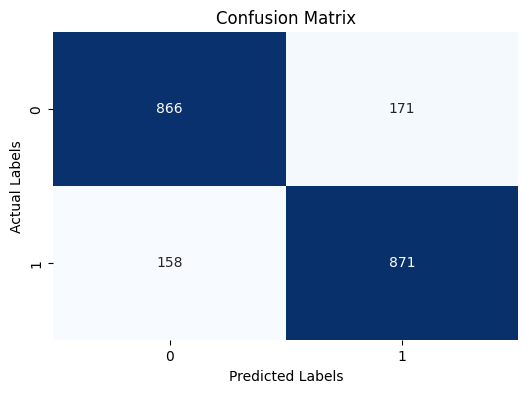

In [49]:
cm_report = confusionMatrix(X_test=X_test, y_test=y_test, model=model)

## ----------------------------------------X--------------------------------------------------------------------------------X----------------------------------------

# Optionals
- **1. Hyperparameter Tuning**
  - You can improve the model’s performance by tuning its hyperparameters using techniques like GridSearchCV or RandomizedSearchCV.
- **2. Cross-Validation**
  - Cross-validation can help assess model performance in a more robust manner by using different data splits for training and testing.
- **3. Feature Importance**
  - Feature importance refers to techniques that help you identify which features (independent variables) contribute the most to the target prediction. It is not mandatory but highly useful in understanding the relationship between input features and the model’s prediction. It can also help improve model interpretability and performance.

## 1. Hyper Parameter Tuning

In [102]:
def finetuning(model: object = None):
     """
     Evaluates the specified model on the input DataFrame.

     Parameters:
     model (object): The model to be evaluated.

     Returns:
     dict: The best parameters of the model.
    """
     param_grid = {
          'learning_rate': [0.1, 0.01, 0.001],
          'max_depth': [3, 5, 7],
          'n_estimators': [50, 100, 200],
          'subsample': [0.5, 0.7, 0.9],
          'colsample_bytree': [0.5, 0.7, 0.9]
     }                                        #XGBClassifier parameters
    
     # param_grid = {'max_features': ['sqrt', 'log2', None],
     #      'n_estimators':[1000],
     #           'criterion': ['entropy'],    
     #      'max_depth': [10],
     #      'min_samples_leaf': [1, 3, 5, 7],
     #      'min_samples_split': [2, 4, 6, 8]
     #      }                                 #RandomForestClassifier parameters
    
     grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')
     grid_search.fit(X_train, y_train)
     best_params = grid_search.best_params_
     pprint(f"Best parameters: {best_params}")
     return best_params
     

In [103]:
fine_tuning = finetuning(model=XGBClassifier())

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
("Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, "
 "'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}")


In [56]:
def fineTunedModelTraining(X_train: pd.DataFrame = None, y_train: pd.DataFrame = None, model: str = None):
    """
    Trains the specified model on the input DataFrame.
    
    Parameters:
    X_train (pd.DataFrame): The training input DataFrame.
    y_train (pd.DataFrame): The training target variable DataFrame.
    model (str): The model to be trained. Possible values are 'LogisticRegression', 'RandomForestClassifier', and 'XGBClassifier' etc.
     Returns:
    object: The trained model.
    """
    if model == 'LogisticRegression':
        model = LogisticRegression(max_iter=1000)
    elif model == 'RandomForestClassifier':
        model = RandomForestClassifier(criterion= 'entropy', max_depth= 3, 
                                       max_features= 'log2', min_samples_leaf= 1, 
                                       min_samples_split= 2, n_estimators= 1000)
    elif model == 'XGBClassifier':
        model = XGBClassifier(colsample_bytree= 0.7, 
                              learning_rate= 0.1, max_depth= 5, 
                              n_estimators= 200, subsample= 0.9)
    else:
        pass
    model.fit(X_train, y_train)
    return model

In [57]:
fineTuned_model = fineTunedModelTraining(X_train=X_train, y_train=y_train, model='XGBClassifier')

In [58]:
fineTuned_evaluated_model = modelEvaluation(X_test=X_test, y_test=y_test, model=fineTuned_model)

Accuracy Score: 0.8436592449177154 
F1 Score: 0.8447861604997597


- The fine-tuned XGBClassifier achieved a slight improvement in performance with an accuracy score of `0.844` and an F1 score of `0.844`, compared to the normal model's accuracy of `0.841` and F1 score of `0.841`.

## 2. Feature Importance

In [99]:
def featureImportance(model: object = None):
    """
    Plot feature importance scores as a bar chart.

    Parameters
    ----------
    model : object, optional
        A trained model with a feature_importances_ attribute, by default None
        
    Returns:
    Plot: The feature importance of the model.
    """
    feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(6,4))
    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.title("Feature Importance")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.show()
    # return print(feature_imp)

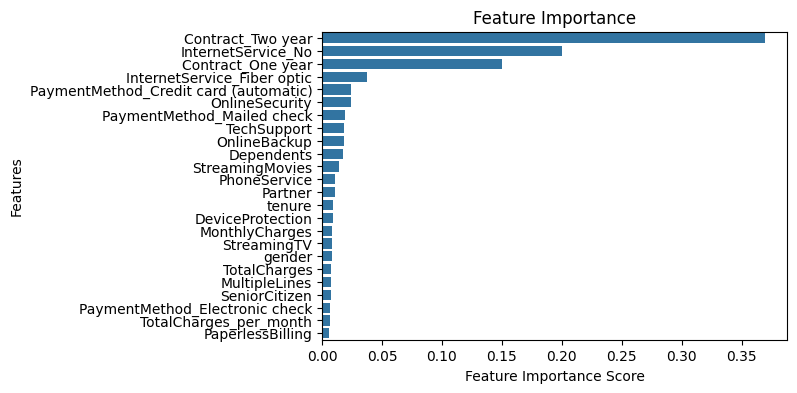

In [100]:
feature_imp = featureImportance(model=model)

In [59]:
def featureImportanceTraining(data: pd.DataFrame = None):
    """
    Trains a model on the selected features of the data, applies SMOTE to balance the data, and evaluates the model on the test data.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame to be split into training and testing sets.

    Returns
    -------
    evaluated_model : dict
        A dictionary containing the model evaluation metrics.
    """
    
    selected_features = ['Contract_Two year', 'InternetService_No', 'Contract_One year', 
                     'PaymentMethod_Mailed check', 'OnlineSecurity', 
                     'PaymentMethod_Credit card (automatic)', 'TechSupport',
                     'Dependents', 'OnlineBackup', 'PhoneService', 
                     'InternetService_Fiber optic', 'StreamingMovies', 
                     'Partner', 'StreamingTV', 'tenure', 'Churn']
    
    X_selected = data[selected_features]
    balanced_data = dataBalancing(data=X_selected, methods='SMOTE')
    X, y = balanced_data
    X_train, X_test, y_train, y_test = dataSplit(X=X, y=y)
    model = modelTraining(X_train=X_train, y_train=y_train, model='XGBClassifier')
    evaluated_model = modelEvaluation(X_test=X_test, y_test=y_test, model=model)
    
    return evaluated_model

In [60]:
featureImportance_Evaluated_model = featureImportanceTraining(data=data)

No of counts before SMOTE] Sampling:
  Counter({0: 5163, 1: 1869})
No of counts after SMOTE Sampling:
  Counter({0: 5163, 1: 5163})
Accuracy Score: 0.81945788964182 
F1 Score: 0.8294467306812986


- The model trained with selected features based on feature importance achieved an accuracy score of `0.819` and an F1 score of `0.827`, which is lower in performance compared to the previous model trained with all `24 features`.

## 3. Cross Validation

### 3.1 Cross Validation on XGBClassifier

In [87]:
def crossValidation(data: pd.DataFrame = None):
    
    balanced_data = dataBalancing(data=data, methods='SMOTE')
    X, y = balanced_data
    X_train, X_test, y_train, y_test = dataSplit(X=X, y=y)
    model = modelTraining(X_train=X_train, y_train=y_train, model='XGBClassifier')
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    
    return print(f"Cross-Validation Accuracy on XGBClassifier model:\n  {scores.mean()}")


In [88]:
crossValidation_score = crossValidation(data=data)

No of counts before SMOTE] Sampling:
  Counter({0: 5163, 1: 1869})
No of counts after SMOTE Sampling:
  Counter({0: 5163, 1: 5163})
Cross-Validation Accuracy on XGBClassifier model:
  0.8442023724629617


### 3.2 Cross Validation on RandomForestClassifier

In [89]:
def crossValidation(data: pd.DataFrame = None):
    
    balanced_data = dataBalancing(data=data, methods='SMOTE')
    X, y = balanced_data
    X_train, X_test, y_train, y_test = dataSplit(X=X, y=y)
    model = modelTraining(X_train=X_train, y_train=y_train, model='RandomForestClassifier')
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    
    return print(f"Cross-Validation Accuracy on RandomForestClassifier model:\n  {scores.mean()}")

In [90]:
crossValidation_score = crossValidation(data=data)

No of counts before SMOTE] Sampling:
  Counter({0: 5163, 1: 1869})
No of counts after SMOTE Sampling:
  Counter({0: 5163, 1: 5163})
Cross-Validation Accuracy on RandomForestClassifier model:
  0.8403649284828919


- Both models were evaluated using cross-validation with SMOTE-balanced data. The RandomForestClassifier  achieved a mean F1 score of 0.840, while the XGBClassifier slightly outperformed it with a mean F1 score of 0.844, indicating that XGBClassifier offers a marginally better performance for this dataset.